### Importación de datos



In [64]:
from matplotlib import pyplot as plt

In [44]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [45]:
tiendas = [tienda, tienda2, tienda3, tienda4]
ingresos_por_tienda = []

In [46]:
for tienda in tiendas:
  ingresos_por_tienda.append(sum(tienda['Precio']))
ingresos_por_tienda

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

In [50]:
print(ingresos_por_tienda[0] - ingresos_por_tienda[3])

112504700.0


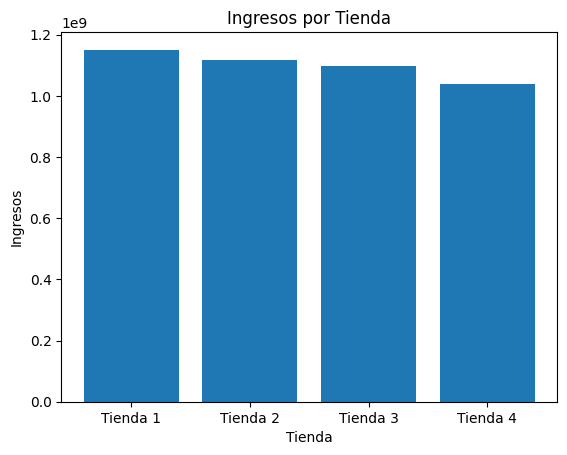

In [65]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.bar(nombres_tiendas, ingresos_por_tienda)
plt.title('Ingresos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos')
plt.show()

# 2. Ventas por categoría

In [53]:
incidencias_categorias = []
incidencias_categorias_total = []
categorias = set(tienda['Categoría del Producto'])
categorias

{'Artículos para el hogar',
 'Deportes y diversión',
 'Electrodomésticos',
 'Electrónicos',
 'Instrumentos musicales',
 'Juguetes',
 'Libros',
 'Muebles'}

In [54]:
incidencias_categorias_total = []
for tienda in tiendas:
  incidencias_categorias = tienda['Categoría del Producto'].value_counts().reset_index()
  incidencias_categorias.columns = ['Categoría del Producto', 'Cantidad']
  incidencias_categorias_total.append(incidencias_categorias)

incidencias_categorias_total

[    Categoría del Producto  Cantidad
 0                  Muebles       465
 1             Electrónicos       448
 2                 Juguetes       324
 3        Electrodomésticos       312
 4     Deportes y diversión       284
 5   Instrumentos musicales       182
 6                   Libros       173
 7  Artículos para el hogar       171,
     Categoría del Producto  Cantidad
 0                  Muebles       442
 1             Electrónicos       422
 2                 Juguetes       313
 3        Electrodomésticos       305
 4     Deportes y diversión       275
 5   Instrumentos musicales       224
 6                   Libros       197
 7  Artículos para el hogar       181,
     Categoría del Producto  Cantidad
 0                  Muebles       499
 1             Electrónicos       451
 2                 Juguetes       315
 3        Electrodomésticos       278
 4     Deportes y diversión       277
 5                   Libros       185
 6   Instrumentos musicales       177
 7  Artícu

# 3. Calificación promedio de la tienda


In [8]:
promedio_calificaciones = []
for tienda in tiendas:
  promedio_calificaciones.append(tienda['Calificación'].mean())

promedio_calificaciones


[np.float64(3.976685036032217),
 np.float64(4.037303942348453),
 np.float64(4.048325561678677),
 np.float64(3.9957591178965224)]

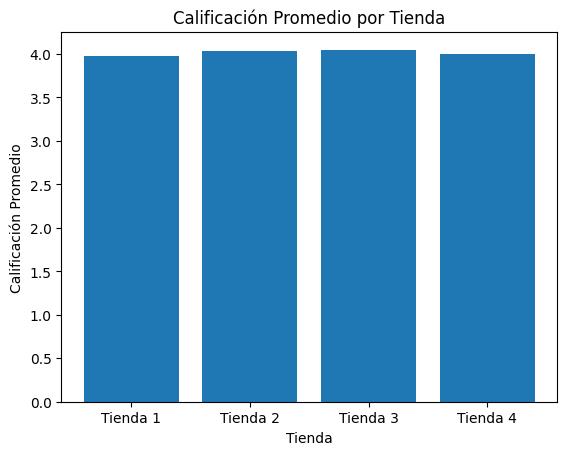

In [66]:
plt.bar(nombres_tiendas, promedio_calificaciones)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.show()

# 4. Productos más y menos vendidos

In [100]:
incidencias_productos = []
incidencias_productos_total = []
productos = set(tienda['Producto'])
productos_menos_vendidos = []
productos_mas_vendidos = []

In [101]:
for tienda in tiendas:
  incidencias_productos = tienda['Producto'].value_counts().reset_index()
  incidencias_productos.columns = ['Producto', 'Cantidad']
  incidencias_productos_total.append(incidencias_productos)
for i in range(len(incidencias_productos_total)):
  productos_menos_vendidos.append(incidencias_productos_total[i].tail(3))
  productos_mas_vendidos.append(incidencias_productos_total[i].head(3))



[        Producto  Cantidad
0     Microondas        60
1  TV LED UHD 4K        60
2        Armario        60,                     Producto  Cantidad
0  Iniciando en programación        65
1                 Microondas        62
2                    Batería        61,           Producto  Cantidad
0    Kit de bancas        57
1  Mesa de comedor        56
2        Cama king        56,                   Producto  Cantidad
0                 Cama box        62
1               Cubertería        59
2  Dashboards con Power BI        56]

[                     Producto  Cantidad
48            Olla de presión        35
49  Auriculares con micrófono        33
50               Celular ABXY        33,            Producto  Cantidad
48  Mesa de comedor        34
49        Impresora        34
50    Juego de mesa        32,                    Producto  Cantidad
48                  Mochila        36
49               Microondas        36
50  Bloques de construcción        35,               Producto  Cantid

# 5. Envío promedio por tienda

In [12]:
promedio_envios = []
for tienda in tiendas:
  promedio_envios.append(tienda['Costo de envío'].mean())

promedio_envios

[np.float64(26018.60958033065),
 np.float64(25216.235693090293),
 np.float64(24805.680373039424),
 np.float64(23459.457167090754)]

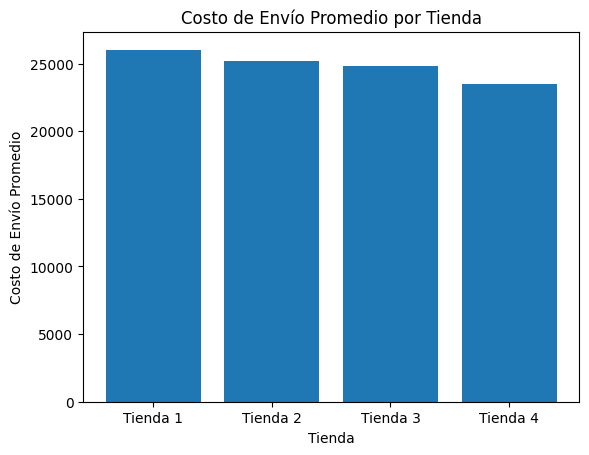

In [67]:
plt.bar(nombres_tiendas, promedio_envios)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()

# **Informe Final**

**Introducción**

---


  Con el propósito de determinar el cierre de una sucursal de la empresa perteneciente al señor Juan Pereyra para invertir en un nuevo negocio, se identificó la propiedad más débil en movimiento económico y para ello, se realizó un análisis profundo acerca de las características de sus tiendas comenzando con datos como promedios de costos de envío, ingresos totales y otros factores. Una vez obtenida la información, se contrastaron los datos para crear una visión general sobre el problema. A continuación, se desarrollará cada aspecto para en definitiva, ofrecer una respuesta ante esta decisión.

# Análisis
---
  Para comenzar, se analizaron características generales de cada sucursal para determinar la tienda menos productiva. Comenzando con las cifras de facturación, en las cuales existía una diferencia de 112 millones de pesos entre la tienda 1 y 4, siendo esta última la que menos facturación maneja de todas  


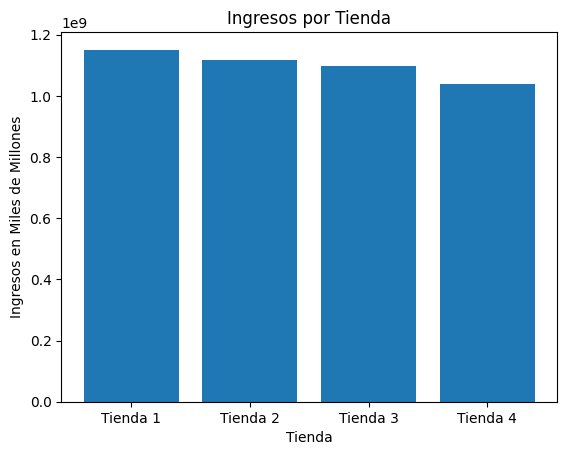

In [80]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.bar(nombres_tiendas, ingresos_por_tienda)
plt.title('Ingresos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos en Miles de Millones')
plt.show()

# Ventas

---
En las categorías de artículos, los productos menos vendidos fueron Libros, Artículos para el hogar e Instrumentos musicales. La tienda 4 fue quien tuvo menor cantidad de ventas en general

# Calificación de tiendas

---
  Todas las tiendas poseen buenas reseñas en general, varian por unos cuantos decimales entre sí, este dato es desestimable porque no aporta información relevante para este caso

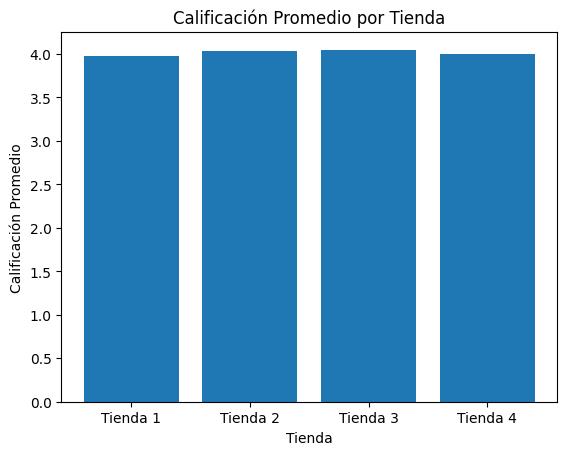

In [79]:
plt.bar(nombres_tiendas, promedio_calificaciones)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.show()

# Popularidad de Productos
---

No existe una tendencia clara que apunte a una categoría específica de objetos para todas las tiendas, sin embargo, por separado si que existen diferencias entre la popularidad de los productos. La primera tienda vende más objetos para una casa como muebles o una televisión, la segunda es desconocida una tendencia, la tercera por muebles en casa y la cuarta no posee ninguna tendencia. La segunda y cuarta son quienes los clientes escogen sin una predominancia fuerte para la compra de un producto, por ende, las más débiles al no poseer una clientela preferencial

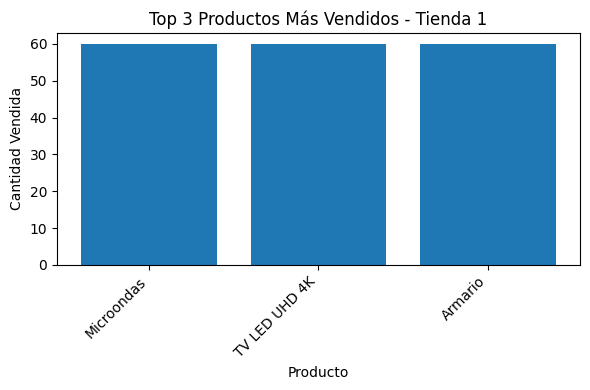

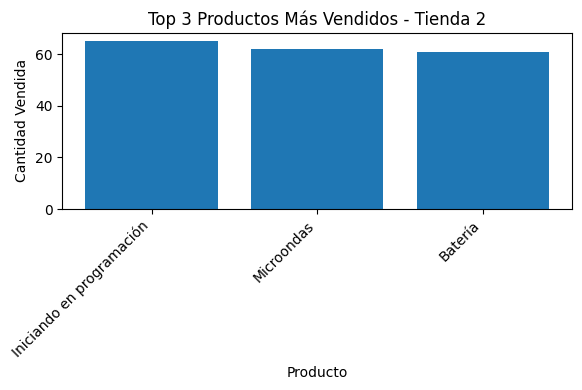

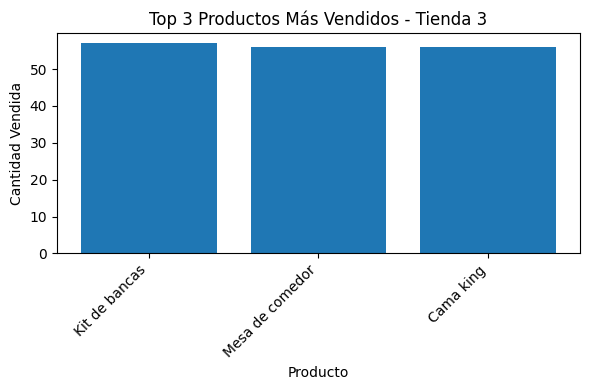

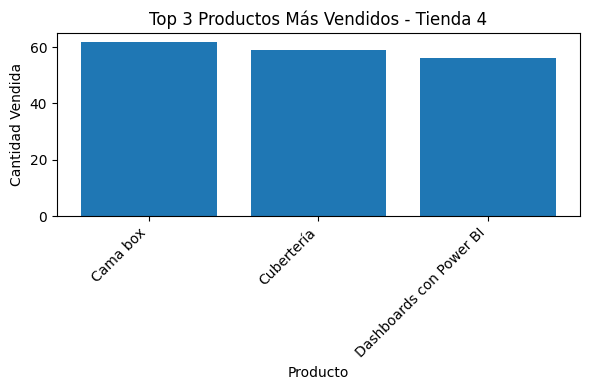

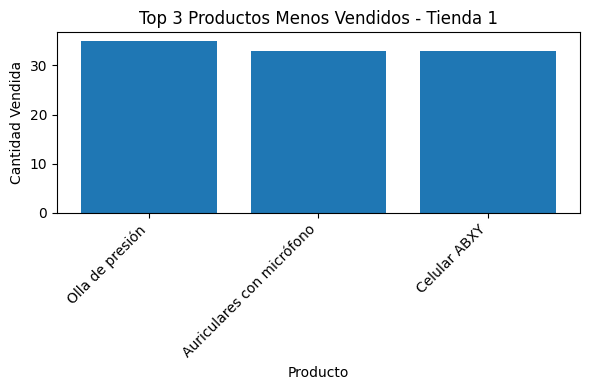

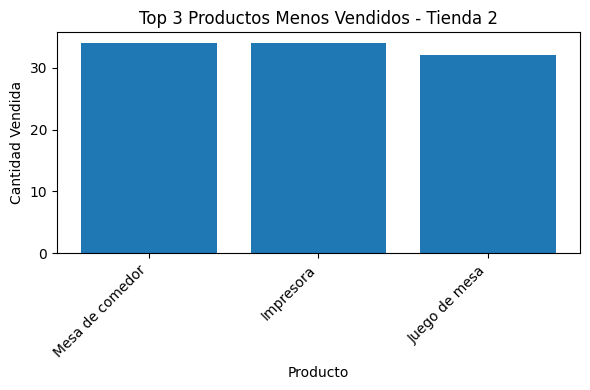

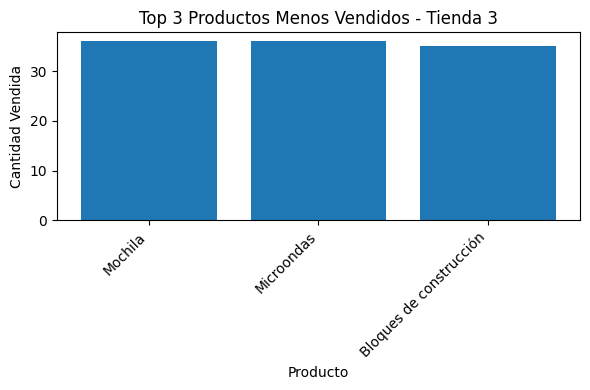

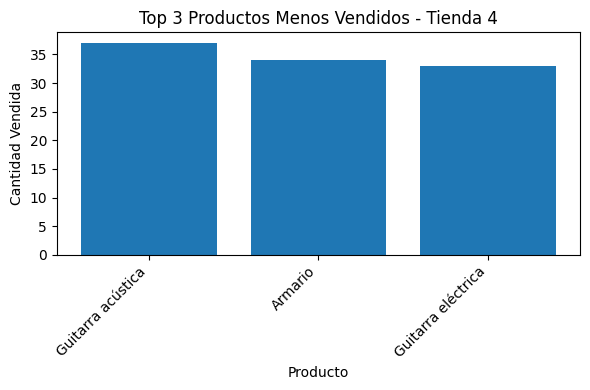

In [107]:
for i, tienda_df in enumerate(productos_mas_vendidos):
    plt.figure(figsize=(6, 4))
    plt.bar(tienda_df['Producto'], tienda_df['Cantidad'])
    plt.title(f'Top 3 Productos Más Vendidos - Tienda {i+1}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for i, tienda_df in enumerate(productos_menos_vendidos):
    plt.figure(figsize=(6, 4))
    plt.bar(tienda_df['Producto'], tienda_df['Cantidad'])
    plt.title(f'Top 3 Productos Menos Vendidos - Tienda {i+1}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Costo de envío**

---

Entre las tiendas, la primera es la más cara y la última la más barata respecto a los envíos, los costos descienden de forma ordenada entre tiendas, la diferencia entre ellos es de tres mil pesos.

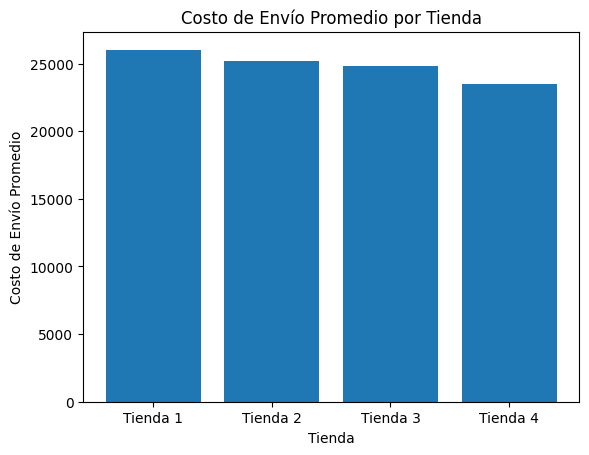

In [108]:
plt.bar(nombres_tiendas, promedio_envios)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()

# **Conclusión**

---
En base a los datos recabados anteriormente, se estima que la cuarta sucursal es la mejor opción para ser cerrada por lo siguiente


*   Es la tienda con la menor facturación de todas
*   No tiene una fortaleza fuerte de ventas hacia una categoría específica, es muy general
*   Es la tienda con menores ventas

Sus puntos a favor es que:

*   Es la tienda con menor costo de envío, siendo una diferencia promedial pronunciada de 3 mil pesos
*   Tiene una reputación positiva en base a las calificaciones de los usuarios

Es por esto que, se recomienda el cierre de la cuarta sucursal.






